## An Experimental Discussion of Ratios

### Introduction

This is an introductory ananylsis into the ratios that finance professionals use (and don't use) in order to rank risk adjusted returns.

The need for this study comes from the overwheling popularity of the Sharpe and Sortino Ratios. The Sharpe ratio in simplest terms is a ratio of average return to volatility. It's main competitor - the sortino ratio- is actually the same ratio for a normally distributed portfolio. Sortino Ratio only factors in volatility to the downside (normally std deviation/2). 

Volatility, in my opinion, is not the direct enemy (Losing capital is the enemy). Professionals use these ratio to determine "Risk Adjusted Rates of Return" and this study will test if that is actually what any of these ratios produce.

The Methods taken are somewhat unorthodox for a financial review. Normally we would use historical data in order to prove concepts. However, for this initial probe historical data would be much more 'noisy' than our data here. This Project is meant to focus exclusively on popular risk ratios and their ability to rank risk vs reward.



### Methods

The Study will use many different ratios in order to pick portfolios. This will primarily use a MonteCarlo-like experiment in order to test the ratios themselves. 

We will randomly generate 3 portfolios with a normal distribution and a random mean and standard deviation. We will then use numerous ratios to pick different portfolios. The sharpe portfolio will choose by using the sharpe ratio and the sortino portfolio will choose using the sortino ratio.. ect. (Although practically the Storino ratio will pick the same portfolios as the Sharpe ratio due to the normally distributed portfolios). Each portfolio will have 20 stocks inside and we will use a random generator to generate the 20 individual returns and then aggregate them into a final return for that individual porfolio. This process will then be done 10,000 times. The size of the dataset will allow us to have a good understanding of which methods actually pick based on "Risk Adjusted Rate of Return". 

As a disclaimer-- there are many factors that go into picking a good portfolio and co-variance to the market and co-variance to each asset are both factors left out of this experiment. This study assumes that all assets in porfolios have the same Beta and that all portfolios are perfectly independent of eachother. We will also assume that the risk free rate of interest is zero and the risk free volatility is zero. In our current economic climate--this may be a reasonable assumption.

During evaluation we will actually use the Sharpe Ratio as the primary criteria for determining stock performance. Secondarily we will look at Maximum Drawdown, Probability of Negative outcomes, and the Com ratio (Described Below).


### Ratios

- Sharpe Ratio- mean vs std deviation
- Sortino Ratio-mean vs std deviation to the downside
- Highest Mean -maximum mean
- Lowest Std Deviation- minimum std deviation
- Lowest Statistal minimum probability of negative return
- Com ratio-Ratio of mean return to probability of negative return

I will exclude the Treynor Ratio for this analysis because it primariliy is based on Beta which is a covariance to market returns. My goal for this study is to test portfolios that only vary in two ways-mean and std deviation. Perhaps there may be rationale for a second experiment involving covariance to market index.

In [163]:
import random
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

com=[]
shp=[]
sor=[]
mean=[]
std=[]
prob=[]
ratio_c=[]
ratio_shp=[]

for i in range(0,10000):
    ## Three Stocks with ranges of 1-20% annual returns
    ## and Std Deviations ranging from the generated mean return to 50 (minimum of 1)
    mean1=random.randrange(1, 20,1)
    stddev1=random.randrange(mean1,50,1)
    mean2=random.randrange(1,20,1)
    stddev2=random.randrange(mean2,50,1)
    mean3=random.randrange(1,20,1)
    stddev3=random.randrange(mean3,50,1)
    
    
    ##Probabilities of returns below Zero from Gaussian Distribtuion
    prob1=norm.cdf(0,mean1,stddev1)
    prob2=norm.cdf(0,mean2,stddev2)
    prob3=norm.cdf(0,mean3,stddev3)
    
    ##Ratio defined as the mean divided by the probability of losing money
    com1=mean1/prob1
    com2=mean2/prob2
    com3=mean3/prob3

    
    ##Sharpe- Mean divided by std deviation
    shp1=mean1/stddev1
    shp2=mean2/stddev2
    shp3=mean3/stddev3
    
    ## Sortino Ratio
    sor1=mean1/(stddev1/2)
    sor2=mean2/(stddev2/2)
    sor3=mean3/(stddev3/2)
    
    
    ## Com Selection
    if max(com1,com2,com3)==com1:
        com.append([mean1,stddev1])
        ratio_c.append(com1)
    elif max(com1,com2,com3)==com2:
        com.append([mean2,stddev2])
        ratio_c.append(com2)
    elif max(com1,com2,com3)==com3:
        com.append([mean3,stddev3])
        ratio_c.append(com3)
    else:
        com.append(None)
        
        
    #Sharpe Selection    
    if max(shp1,shp2,shp3)==shp1:
        shp.append([mean1,stddev1])
        ratio_shp.append(shp1)
    elif max(shp1,shp2,shp3)==shp2:
        shp.append([mean2,stddev2])
        ratio_shp.append(shp2)
    elif max(shp1,shp2,shp3)==shp3:
        shp.append([mean3,stddev3])
        ratio_shp.append(shp3)
    else:
        shp.append(None)
    
    
    ##Sortino Selection
    if max(sor1,sor2,sor3)==sor1:
        sor.append([mean1,stddev1])
    elif max(sor1,sor2,sor3)==sor2:
        sor.append([mean2,stddev2])
    elif max(sor1,sor2,sor3)==sor3:
        sor.append([mean3,stddev3])
    else:
        sor.append(None)
    
    ## Mean Selection
    if max(mean1,mean2,mean3)==mean1:
        mean.append([mean1,stddev1])
    elif max(mean1,mean2,mean3)==mean2:
        mean.append([mean2,stddev2])
    elif max(mean1,mean2,mean3)==mean3:
        mean.append([mean3,stddev3])
    else:
        mean.append(None)
        
    ## Lowest Std Selection
    if min(stddev1,stddev2,stddev3)==stddev1:
        std.append([mean1,stddev1])
    elif min(stddev1,stddev2,stddev3)==stddev2:
        std.append([mean2,stddev2])
    elif min(stddev1,stddev2,stddev3)==stddev3:
        std.append([mean3,stddev3])
    else:
        std.append(None)
    
    
    ## Prob Selection
    if min(prob1,prob2,prob3)==prob1:
        prob.append([mean1,stddev1])
    elif min(prob1,prob2,prob3)==prob2:
        prob.append([mean2,stddev2])
    elif min(prob1,prob2,prob3)==prob3:
        prob.append([mean3,stddev3])
    else:
        prob.append(None)
    
    

In [164]:
com_returns=[]
shp_returns=[]
prob_returns=[]
std_returns=[]
mean_returns=[]
sor_returns=[]
for each in com:
    x=np.random.normal(each[0], each[1], 20)
    com_returns.append(sum(x)/len(x))
for each in shp:
    y=np.random.normal(each[0], each[1], 20)
    shp_returns.append(sum(y)/len(y))
for each in sor:
    y=np.random.normal(each[0], each[1], 20)
    sor_returns.append(sum(y)/len(y))
for each in prob:
    y=np.random.normal(each[0], each[1], 20)
    prob_returns.append(sum(y)/len(y))
for each in mean:
    y=np.random.normal(each[0], each[1], 20)
    mean_returns.append(sum(y)/len(y))
for each in std:
    y=np.random.normal(each[0], each[1], 20)
    std_returns.append(sum(y)/len(y))

In [165]:
Frame=pd.DataFrame(
    {"Sharpe":shp_returns,
     "Sortino":sor_returns,
     "High Mean":mean_returns,
    "Low Std":std_returns,
    "Low Prob":prob_returns,
    "Com":com_returns}
)

In [166]:
Frame.describe()

,Sharpe,Sortino,High Mean,Low Std,Low Prob,Com
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,12.798659,12.792840,14.606297,8.891076,12.952018,14.508106
std,7.470577,7.494005,8.355562,7.096768,7.438023,7.854893
min,-19.910050,-15.869523,-34.764159,-19.423939,-24.933204,-23.522255
25%,7.460633,7.431100,9.259958,3.718989,7.648285,9.472347
50%,12.302140,12.315013,14.623106,8.107386,12.567844,14.346743
75%,17.590569,17.484921,19.924105,13.511675,17.702023,19.297466
max,47.018080,49.903143,50.792930,41.148490,48.793635,52.204035


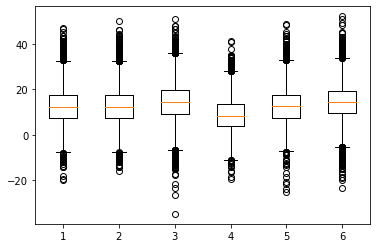

In [167]:
plt.boxplot([Frame["Sharpe"],Frame["Sortino"],Frame["High Mean"],Frame["Low Std"],Frame["Low Prob"],Frame["Com"]])

plt.show()

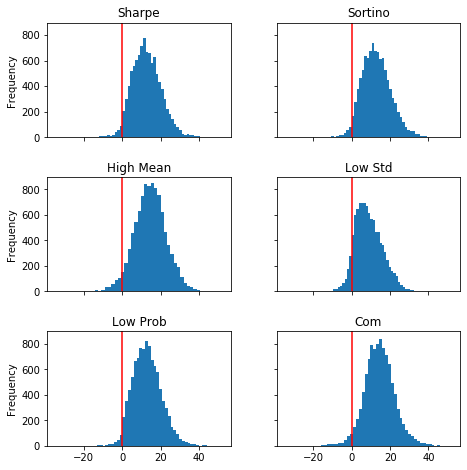

In [178]:
fig, ax=plt.subplots(3,2, figsize=(7,7),sharex=True,sharey=True)

fig.tight_layout(pad=3)

ax[0,0].hist(Frame["Sharpe"],bins=50,label="Sharpe")
ax[0,0].axvline(x=0,color='r')
ax[0,0].set_title("Sharpe")
ax[0,0].set_ylabel("Frequency")

ax[0,1].hist(Frame["Sortino"],bins=50,label="Sortino")
ax[0,1].axvline(x=0,color='r')
ax[0,1].set_title("Sortino")

ax[1,0].hist(Frame["High Mean"],bins=50)
ax[1,0].axvline(x=0,color='r')
ax[1,0].set_title("High Mean")
ax[1,0].set_ylabel("Frequency")

ax[1,1].hist(Frame["Low Std"],bins=50)
ax[1,1].axvline(x=0,color='r')
ax[1,1].set_title("Low Std")

ax[2,0].hist(Frame["Low Prob"],bins=50)
ax[2,0].axvline(x=0,color='r')
ax[2,0].set_title("Low Prob")
ax[2,0].set_ylabel("Frequency")

ax[2,1].hist(Frame["Com"],bins=50)
ax[2,1].axvline(x=0,color='r')
ax[2,1].set_title("Com")

plt.show()

In [169]:
print("Now, In order to put the test into a language most people already know.\n I Will use the Sharpe Ratios to determine the \"Best\" Portfoliio \n")

one=Frame["Sharpe"].mean()/Frame["Sharpe"].std()
drop=min(Frame["Sharpe"].dropna())
print("Sharpe Portfolio had a sharpe ratio of {} and a max drawdown of {}".format(round(one,4),round(drop,0)))

two=Frame["Sortino"].mean()/Frame["Sortino"].std()
drop=min(Frame['Sortino'].dropna())
print("Sortino Portfolio had a sharpe ratio of {} and a max drawdown of {}".format(round(two,4),round(drop,0)))

three=Frame["High Mean"].mean()/Frame["High Mean"].std()
drop=min(Frame['High Mean'].dropna())
print("High Mean portfolio had a sharpe ratio of {} and a max drawdown of {}".format(round(three,4),round(drop,0)))

four=Frame["Low Std"].mean()/Frame["Low Std"].std()
drop=min(Frame['Low Std'].dropna())
print("Low Std Deviation portfolio had a sharpe ratio of {} and a max drawdown of {}".format(round(four,4),round(drop,0)))
      
five=Frame["Low Prob"].mean()/Frame["Low Prob"].std()
drop=min(Frame['Low Prob'].dropna())
print("Low Prob of Negativity portfolio had a sharpe ratio of {} and a max drawdown of {}".format(round(five,4),round(drop,0)))    
      
six=Frame["Com"].mean()/Frame["Com"].std()
drop=min(Frame['Com'].dropna())
print("Com Portfolio had a sharpe ratio of {} and a max drawdown of {}".format(round(six,4),round(drop,0)))

Now, In order to put the test into a language most people already know.
 I Will use the Sharpe Ratios to determine the "Best" Portfoliio 

Sharpe Portfolio had a sharpe ratio of 1.7132 and a max drawdown of -20.0
Sortino Portfolio had a sharpe ratio of 1.7071 and a max drawdown of -16.0
High Mean portfolio had a sharpe ratio of 1.7481 and a max drawdown of -35.0
Low Std Deviation portfolio had a sharpe ratio of 1.2528 and a max drawdown of -19.0
Low Prob of Negativity portfolio had a sharpe ratio of 1.7413 and a max drawdown of -25.0
Com Portfolio had a sharpe ratio of 1.847 and a max drawdown of -24.0


In [170]:
print("Evaluations Based on Other Criteria\n The Com ratio is defined as the return per unit of principal loss risk\n")

one=Frame["Sharpe"].mean()/norm.cdf(0,Frame["Sharpe"].mean(),Frame["Sharpe"].std())
drop=norm.cdf(0,Frame["Sharpe"].mean(),Frame["Sharpe"].std())
print("Sharpe Portfolio had a Com ratio of {} and a Negative Probability of {}\n".format(round(one,4),round(drop,4)))

two=Frame["Sortino"].mean()/norm.cdf(0,Frame["Sortino"].mean(),Frame["Sortino"].std())
drop=norm.cdf(0,Frame["Sortino"].mean(),Frame["Sortino"].std())
print("Sortino Portfolio had a Com ratio of {} and a Negative Probability of {}\n".format(round(two,4),round(drop,4)))

three=Frame["High Mean"].mean()/norm.cdf(0,Frame["High Mean"].mean(),Frame["High Mean"].std())
drop=norm.cdf(0,Frame["High Mean"].mean(),Frame["High Mean"].std())
print("High Mean Portfolio had a Com ratio of {} and a Negative Probability of {}\n".format(round(three,4),round(drop,4)))

four=Frame["Low Std"].mean()/norm.cdf(0,Frame["Low Std"].mean(),Frame["Low Std"].std())
drop=norm.cdf(0,Frame["Low Std"].mean(),Frame["Low Std"].std())
print("Low Standard Dev. Portfolio had a Com ratio of {} and a Negative Probability of {}\n".format(round(four,4),round(drop,4)))

five=Frame["Low Prob"].mean()/norm.cdf(0,Frame["Low Prob"].mean(),Frame["Low Prob"].std())
drop=norm.cdf(0,Frame["Low Prob"].mean(),Frame["Low Prob"].std())
print("Low Prob. of Negativity Portfolio had a Com ratio of {} and a Negative Probability of {}\n".format(round(five,4),round(drop,4)))

six=Frame["Com"].mean()/norm.cdf(0,Frame["Com"].mean(),Frame["Com"].std())
drop=norm.cdf(0,Frame["Com"].mean(),Frame["Com"].std())
print("Com Portfolio had a Com ratio of {} and a Negative Probability of {}".format(round(six,4),round(drop,4)))


Evaluations Based on Other Criteria
 The Com ratio is defined as the return per unit of principal loss risk

Sharpe Portfolio had a Com ratio of 295.3282 and a Negative Probability of 0.0433

Sortino Portfolio had a Com ratio of 291.3826 and a Negative Probability of 0.0439

High Mean Portfolio had a Com ratio of 363.1241 and a Negative Probability of 0.0402

Low Standard Dev. Portfolio had a Com ratio of 84.5698 and a Negative Probability of 0.1051

Low Prob. of Negativity Portfolio had a Com ratio of 317.348 and a Negative Probability of 0.0408

Com Portfolio had a Com ratio of 448.1619 and a Negative Probability of 0.0324


### Conclusions

In all measures the Sharpe and Sortino Portfolios were out performed by other portfolio picking strategies. Truly even the "pick the highest mean" strategy outperformed in this scenario. The fatal flaw lies in the desire for predictable results. These ratios handicap themselves against returns by seeking less volatile assets. Most Investors would agree that a return of 20% with a std deviation of 10% is better than a return of 10% with a standard deviation of 5%. Then why do we use a ratio that defines them to be the same?

The Com ratio portfolio out performed every portfolio as measured by the Com Ratio and the Sharpe ratio as well as Negative Probability. This seems likely due to the non-linear nature of the ratio. It will systematically choose portfolios that are more likely to produce higher risk adjusted returns than any of the other strategies listed. 

The Sharpe and Sortino Ratios have been useful and practical tools in the past but they are inneficient at producing the type of results they are expected to. Simply put, through this experiment it has become clear that they do not reliably rank portfolios based on risk adjusted rate of return.


#### Additional Thoughts and Biases
Com ratio will fail if the probability of a negative return is rounded to 0. You will be dividing by zero. In these particular instances approximating the return to a low value such as .001% as a concrete minimum will allow you to rank accordingly. I do not know of any portfolio with a zero probability of negative returns. Even the risk free rate of interest likely has a non-zero probability. Low enough that we have never seen it but not unfathomable.

As far as I can tell the experiment itself is free of any structural bias against the Sharpe/ Sortino Ratios. However, I do believe the experiment would be enhanced using real world historical data-although that comes with its own constraints and assumptions. The thought process for the experiment was to give each ratio an even playing field to make good decisions without any of the noise typically involved in real world data.

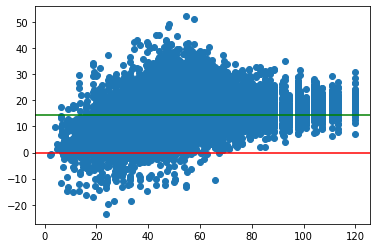

In [171]:
plt.scatter(ratio_c, Frame["Com"])
plt.axhline(y=Frame["Com"].mean(),color='green')#average return
plt.axhline(y=0,color='red')# Breakeven
##plots of Com ratio vs return

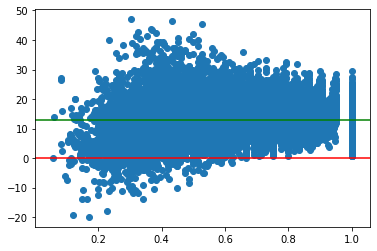

In [172]:
plt.scatter(ratio_shp, Frame["Sharpe"])
plt.axhline(y=Frame["Sharpe"].mean(),color='green')# Average Return
plt.axhline(y=0,color='red')# Breakeven
#plot of sharpe ratio vs return 